This is the graphical representation of the data used from the bureau of labor statistics.

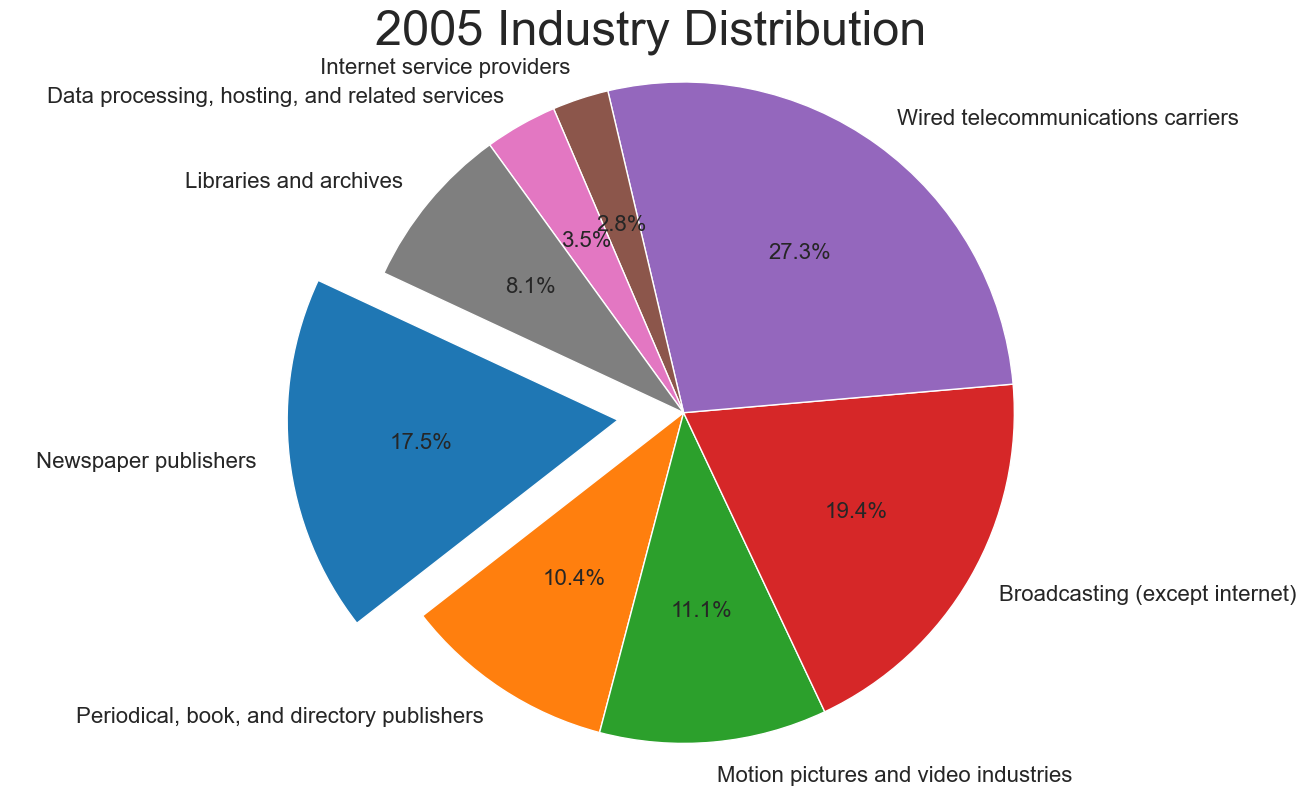

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns

# read data
xls = pd.ExcelFile('Household_Data_Combined_v4.xlsx')

sheets_data = {}
for sheet_name in xls.sheet_names:
    if sheet_name not in ['2005', '2023']:
        continue
    sheet_data = pd.read_excel(xls, sheet_name=sheet_name)
    sheet_data = sheet_data[~sheet_data['Industry'].isin(['Total, 16 years and over', 'Information'])]
    sheet_data = sheet_data.dropna(subset=['Total employed'])
    sheet_data['Total employed'] = pd.to_numeric(sheet_data['Total employed'], errors='coerce')
    sheet_data = sheet_data.dropna(subset=['Total employed'])
    sheets_data[sheet_name] = sheet_data

# Build pie chart for 2005 'Information' industry subcategories
if '2005' in sheets_data:
    plt.figure(figsize=(14, 8))
    industry_labels = sheets_data['2005']['Industry'].tolist()
    explode_values = [0.2 if industry == 'Newspaper publishers' else 0 for industry in industry_labels]
    wrapped_labels = ['\n'.join(textwrap.wrap(label, 50)) for label in industry_labels]
    plt.pie(sheets_data['2005']['Total employed'], labels=wrapped_labels, autopct='%1.1f%%', startangle=155, textprops={'fontsize': 16}, explode=explode_values)
    plt.title('2005 Industry Distribution', fontsize=35)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("Data for the year 2005 is not available or could not be processed.")

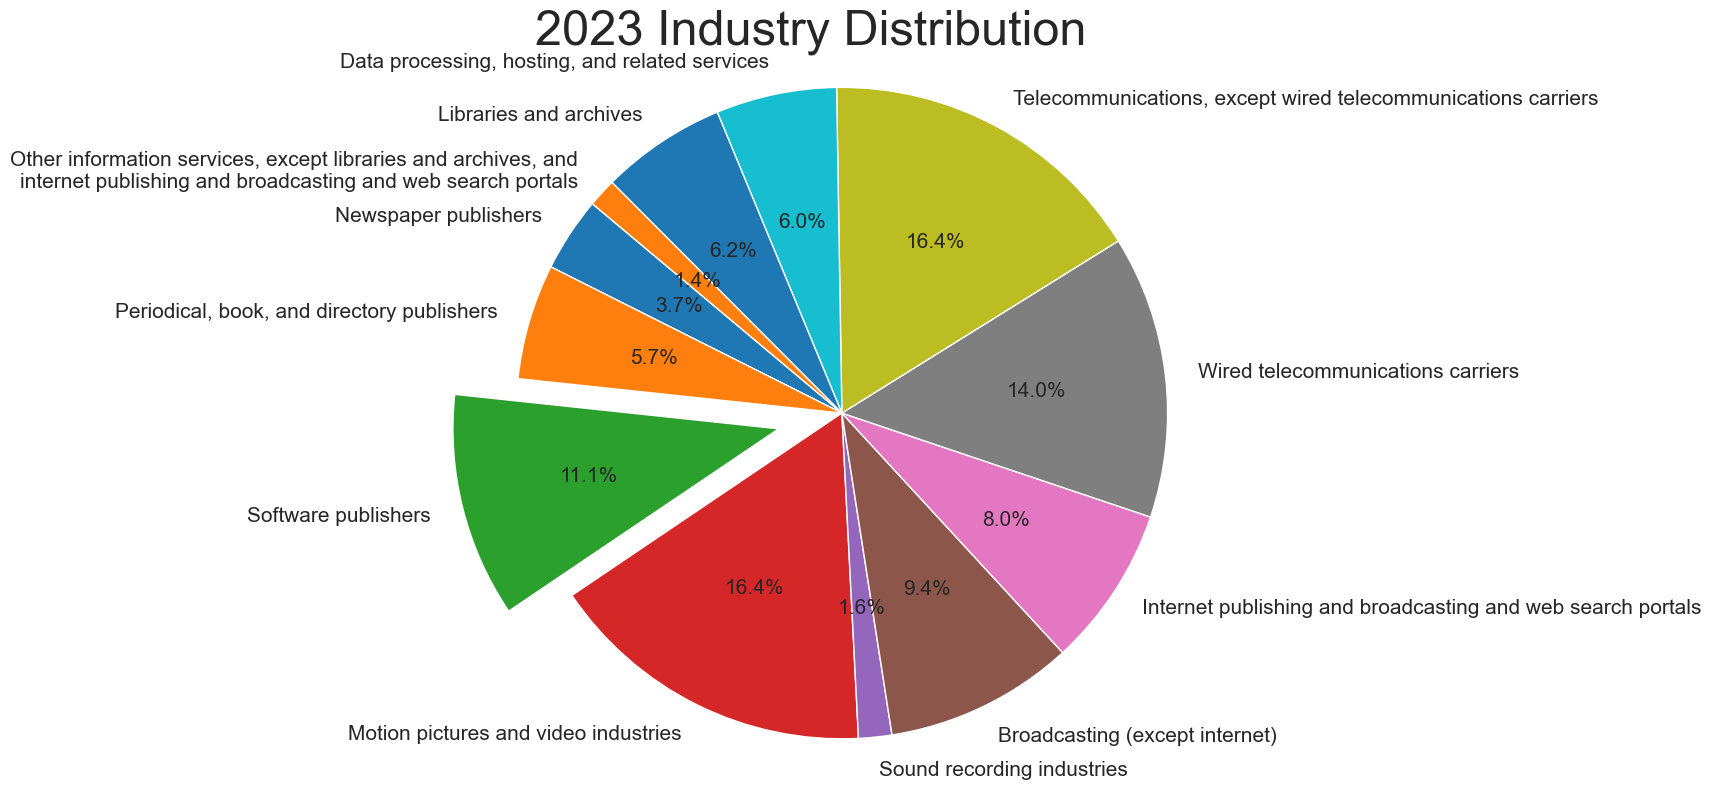

In [3]:
# Create the second pie chart for 2023 'Information' industry subcategories
if '2023' in sheets_data:
    plt.figure(figsize=(14, 8))
    industry_labels = sheets_data['2023']['Industry'].tolist()
    explode_values = [0.2 if industry == 'Software publishers' else 0 for industry in industry_labels]
    wrapped_labels = ['\n'.join(textwrap.wrap(label, 70)) for label in industry_labels]
    plt.pie(sheets_data['2023']['Total employed'], labels=wrapped_labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 15}, explode=explode_values)
    plt.title('2023 Industry Distribution', fontsize=35)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("Data for the year 2023 is not available or could not be processed.")

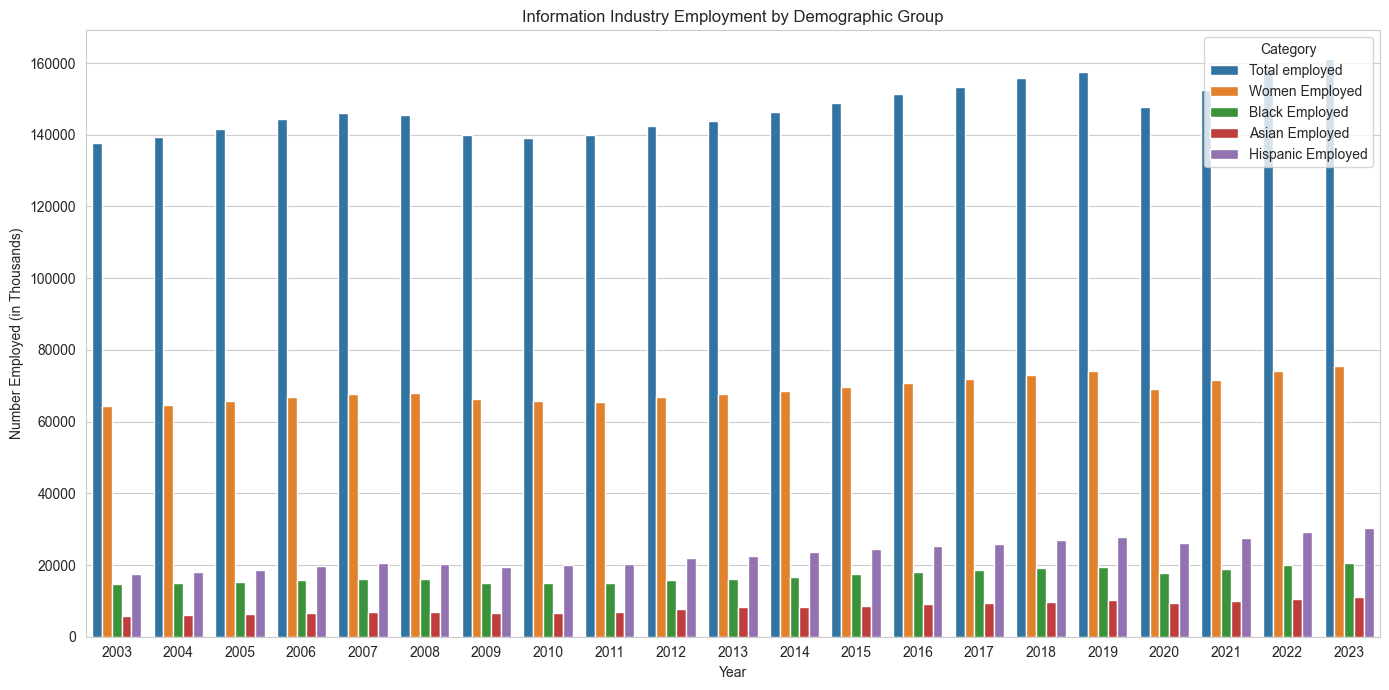

In [6]:
# Load file using Openpyxl, read and concatenate all sheets
data = 'Household_Data_Combined_v4.xlsx'
sheets = pd.read_excel(data, engine='openpyxl', sheet_name=None)
combined_data = pd.concat(sheets.values(), ignore_index=True)

# Data cleaning
cleaned_data = combined_data.dropna(subset=['Total employed', 'Women', 'Black or African American', 'Asian', 'Hispanic or Latino', 'Year']).copy()

numeric_columns = ['Total employed', 'Women', 'Black or African American', 'Asian', 'Hispanic or Latino']
for column in numeric_columns:
    cleaned_data.loc[:, column] = pd.to_numeric(cleaned_data[column], errors='coerce')

cleaned_data.loc[:, 'Women Employed'] = cleaned_data['Total employed'] * (cleaned_data['Women'] / 100)
cleaned_data.loc[:, 'Black Employed'] = cleaned_data['Total employed'] * (cleaned_data['Black or African American'] / 100)
cleaned_data.loc[:, 'Asian Employed'] = cleaned_data['Total employed'] * (cleaned_data['Asian'] / 100)
cleaned_data.loc[:, 'Hispanic Employed'] = cleaned_data['Total employed'] * (cleaned_data['Hispanic or Latino'] / 100)
cleaned_data['Year'] = cleaned_data['Year'].astype(int)
melted_data = cleaned_data.melt(id_vars=['Year'], value_vars=['Total employed', 'Women Employed', 'Black Employed', 'Asian Employed', 'Hispanic Employed'],
                                var_name='Category', value_name='Number of People Employed')

# Build grouped bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.barplot(data=melted_data, x='Year', hue='Category', y='Number of People Employed')
plt.title('Information Industry Employment by Demographic Group')
plt.xlabel('Year')
plt.ylabel('Number Employed (in Thousands)')
plt.legend(title='Category')
plt.tight_layout()
plt.show()
